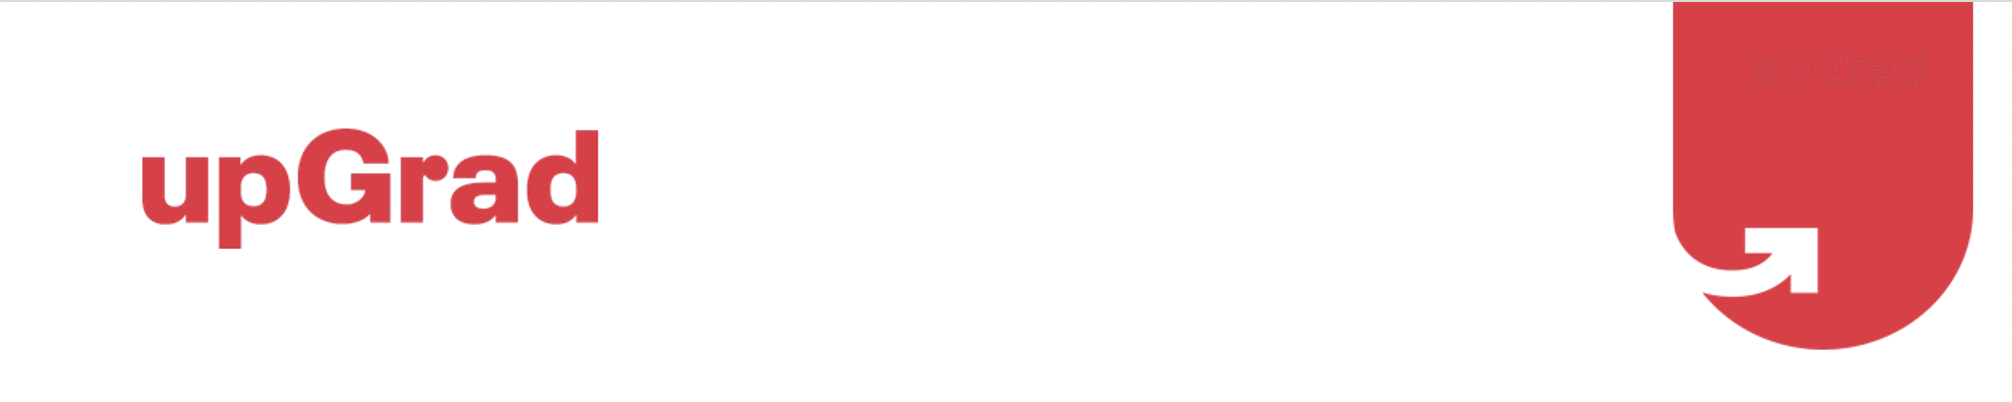

# Introduction to SQLite and its usage with Python

In [1]:
import sqlite3

## Create a connection, a table and add data

In [2]:
# Create connection (db)
conn = sqlite3.connect("student.db")

In [3]:
# Create a cursor
cur = conn.cursor()

In [4]:
# Create table

cur.execute("CREATE TABLE student (name TEXT, last_name TEXT, score REAL)")

In [5]:
# Insert a row in the table

cur.execute("INSERT INTO student VALUES ('Ankur', 'Sharma', '90')")

In [6]:
# Save results
conn.commit()

## Connect to an existing database

In [7]:
conn = sqlite3.connect("student.db")
cur = conn.cursor()

In [8]:
# Run simple query
cur.execute("SELECT * FROM student")
cur.fetchone()

('Ankur', 'Sharma', 90.0)

In [10]:
for row in cur.execute("SELECT * FROM student"):
    print(row)

('Ankur', 'Sharma', 90.0)


## Add several rows

In [11]:
student_record = [
    ("Ben", "Carson", 50),
    ("Deval", "Kris", 80),
    ("Nishant", "Sakshi", 90.5)
]

In [13]:
cur.executemany("INSERT INTO student VALUES (?,?,?)", student_record)

In [14]:
for row in cur.execute("SELECT * FROM student"):
    print(row)

('Ankur', 'Sharma', 90.0)
('Ben', 'Carson', 50.0)
('Deval', 'Kris', 80.0)
('Nishant', 'Sakshi', 90.5)


In [15]:
conn.commit()

In [16]:
conn.close()

## Run queries

In [17]:
conn = sqlite3.connect("student.db")
cur = conn.cursor()

In [18]:
cur.execute("SELECT * FROM student WHERE name= 'Deval'")
cur.fetchall()

[('Deval', 'Kris', 80.0)]

In [19]:
cur.execute("SELECT * FROM student WHERE last_name='Sakshi'")
cur.fetchall()

[('Nishant', 'Sakshi', 90.5)]

In [20]:
cur.execute("SELECT * FROM student WHERE last_name='Tom'")
cur.fetchall()

[]

In [21]:
cur.execute("SELECT * FROM student ORDER BY last_name")
cur.fetchall()

[('Ben', 'Carson', 50.0),
 ('Deval', 'Kris', 80.0),
 ('Nishant', 'Sakshi', 90.5),
 ('Ankur', 'Sharma', 90.0)]

In [22]:
cur.execute("SELECT SUM(score) FROM student")
cur.fetchone()

(310.5,)

In [23]:
conn.close()

# Introduction to Pandas with SQLite

In [1]:
import pandas as pd
import sqlite3
import warnings
warnings.filterwarnings("ignore")

## Create a connection

In [2]:
conn = sqlite3.connect("student.db")
cur = conn.cursor()

In [3]:
cur.execute("SELECT * FROM student")
cur.fetchall()

[('Ankur', 'Sharma', 90.0),
 ('Ben', 'Carson', 50.0),
 ('Deval', 'Kris', 80.0),
 ('Nishant', 'Sakshi', 90.5)]

## Creation of a Dataframe (Pandas)

In [4]:
df = pd.read_sql_query("SELECT * FROM student", conn)

In [5]:
df

,name,last_name,score
0,Ankur,Sharma,90.0
1,Ben,Carson,50.0
2,Deval,Kris,80.0
3,Nishant,Sakshi,90.5


## Run queries from Pandas

In [6]:
pd.read_sql("select * from student", conn)

,name,last_name,score
0,Ankur,Sharma,90.0
1,Ben,Carson,50.0
2,Deval,Kris,80.0
3,Nishant,Sakshi,90.5


In [7]:
pd.read_sql("select * from student where name = 'Ben'", conn)

,name,last_name,score
0,Ben,Carson,50.0


In [8]:
pd.read_sql("select name, last_name from student", conn)

,name,last_name
0,Ankur,Sharma
1,Ben,Carson
2,Deval,Kris
3,Nishant,Sakshi


In [9]:
pd.read_sql("select name, last_name from student order by last_name", conn)

,name,last_name
0,Ben,Carson
1,Deval,Kris
2,Nishant,Sakshi
3,Ankur,Sharma


## Read CSV file from Pandas

In [10]:
pd.read_csv("student_age.csv")

,Name,Age
0,Ankur,31
1,Ben,25
2,Deval,60
3,Nishant,58


In [11]:
student_df = pd.read_csv("student_age.csv")

In [12]:
type(student_df)

pandas.core.frame.DataFrame

In [13]:
student_df.head(2)

,Name,Age
0,Ankur,31
1,Ben,25


## Creating a table in SQLite from a CSV file with Pandas

In [14]:
student_df.to_sql("age_table", conn, if_exists="replace", index=False)

In [15]:
pd.read_sql("select * from age_table", conn)

,Name,Age
0,Ankur,31
1,Ben,25
2,Deval,60
3,Nishant,58


In [16]:
student_df.columns

Index(['Name', 'Age'], dtype='object')

## Function to get all the tables info

In [17]:
conn = sqlite3.connect("student.db")
cur = conn.cursor()

In [18]:
def table_info(conn,cursor):
    """
    prints out all of the columns of every table in the DB
    
    conn: database connection object
    cursor: cursor object
    """
    
    tables = cur.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
    for table_name in tables:
        table_name = table_name[0]
        table = pd.read_sql_query("SELECT * from {} LIMIT 0".format(table_name), conn)
        print(table_name)
        for col in table.columns:
            print("\t "+ col)
            print()

In [19]:
table_info(conn,cur)

student
	 name

	 last_name

	 score

age_table
	 Name

	 Age



## See table schema with SQlite

In [21]:
cur.execute("PRAGMA table_info('age_table')").fetchall()

[(0, 'Name', 'TEXT', 0, None, 0), (1, 'Age', 'INTEGER', 0, None, 0)]

Every row includes:

- Index of the column
- Column Name
- Data type
- Whether or not the column can be NULL
- The default value for the column
- The primary key in the result is 0 for columns that are not the primary key

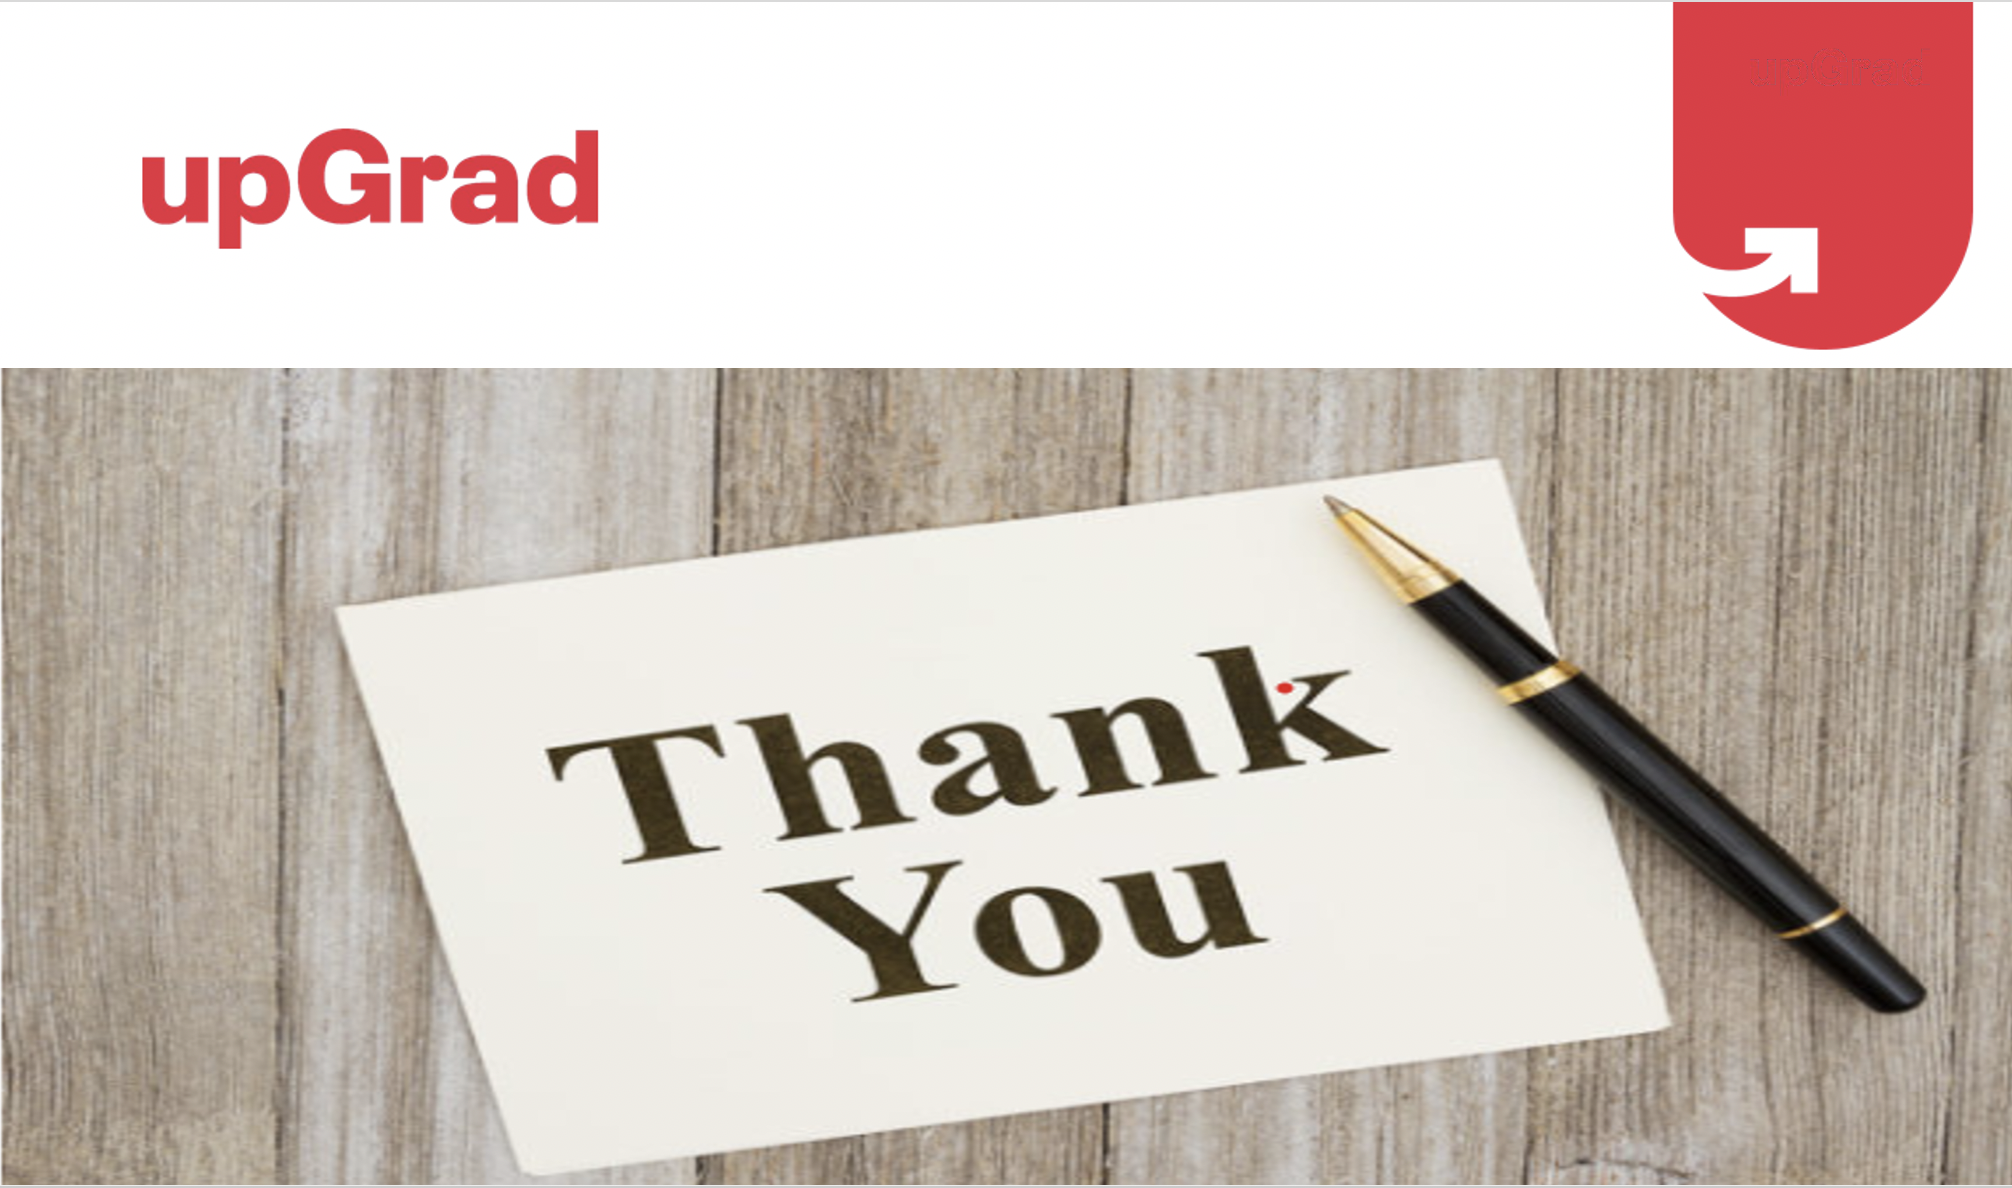